In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [14]:
!git clone https://github.com/pankop/Final_Project_ADD.git

Cloning into 'Final_Project_ADD'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), done.


In [15]:
min = pd.read_csv('/content/min.csv')
max = pd.read_csv('/content/max.csv')

In [16]:
min.head()

,1/5/2024,1/7/2024,1/12/2024,1/13/2024,1/14/2024,1/15/2024,1/18/2024,1/19/2024,1/22/2024,1/26/2024
0,16.2,18.1,19.3,23.2,23.3,22.3,21.2,21.4,15.9,16.3
1,16.2,18.1,19.3,23.2,23.3,22.3,21.2,21.4,15.9,16.3
2,16.4,16.9,19.7,23.5,21.8,21.2,20.0,18.7,13.4,16.6
3,16.2,18.1,19.3,23.2,23.3,22.3,21.2,21.4,15.9,16.3
4,16.1,16.7,19.3,23.6,24.9,23.1,21.6,21.5,13.1,16.2


In [17]:
max.head()

,1/5/2024,1/7/2024,1/12/2024,1/13/2024,1/14/2024,1/15/2024,1/18/2024,1/19/2024,1/22/2024,1/26/2024
0,30.9,36.0,37.0,40.7,36.6,34.4,26.8,27.6,28.0,29.8
1,30.9,36.0,37.0,40.7,36.6,34.4,26.8,27.6,28.0,29.8
2,32.3,37.3,38.1,41.2,40.0,38.1,28.5,30.4,30.6,32.0
3,30.9,36.0,37.0,40.7,36.6,34.4,26.8,27.6,28.0,29.8
4,31.3,35.1,37.1,40.4,36.5,34.5,27.6,28.1,28.5,30.6


In [18]:
# Ensure both dataframes have the same columns
if min.columns.tolist() == max.columns.tolist():
    # Calculate the average
    df = (min + max) / 2

    # Display the first few rows of the resulting dataframe
    print(df.head())

    # Save the average temperature dataframe to a CSV file
    df.to_csv('average_temperature.csv', index=False)
else:
    print("Dataframes have different columns and cannot be averaged.")

   1/5/2024  1/7/2024  1/12/2024  1/13/2024  1/14/2024  1/15/2024  1/18/2024  \
0     23.55     27.05      28.15      31.95      29.95      28.35      24.00   
1     23.55     27.05      28.15      31.95      29.95      28.35      24.00   
2     24.35     27.10      28.90      32.35      30.90      29.65      24.25   
3     23.55     27.05      28.15      31.95      29.95      28.35      24.00   
4     23.70     25.90      28.20      32.00      30.70      28.80      24.60   

   1/19/2024  1/22/2024  1/26/2024  
0      24.50      21.95      23.05  
1      24.50      21.95      23.05  
2      24.55      22.00      24.30  
3      24.50      21.95      23.05  
4      24.80      20.80      23.40  


In [19]:
df.shape

(25, 10)

In [20]:
df.head()

,1/5/2024,1/7/2024,1/12/2024,1/13/2024,1/14/2024,1/15/2024,1/18/2024,1/19/2024,1/22/2024,1/26/2024
0,23.55,27.05,28.15,31.95,29.95,28.35,24.00,24.50,21.95,23.05
1,23.55,27.05,28.15,31.95,29.95,28.35,24.00,24.50,21.95,23.05
2,24.35,27.10,28.90,32.35,30.90,29.65,24.25,24.55,22.00,24.30
3,23.55,27.05,28.15,31.95,29.95,28.35,24.00,24.50,21.95,23.05
4,23.70,25.90,28.20,32.00,30.70,28.80,24.60,24.80,20.80,23.40


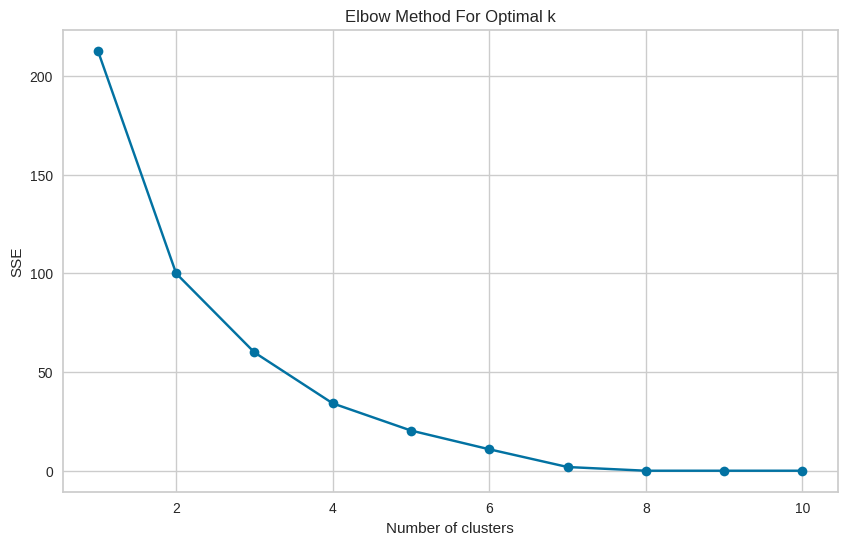

In [21]:
sse = []
k_values = range(1, 11)  # Mencoba jumlah cluster dari 1 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [23]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop(columns=['Cluster']))

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


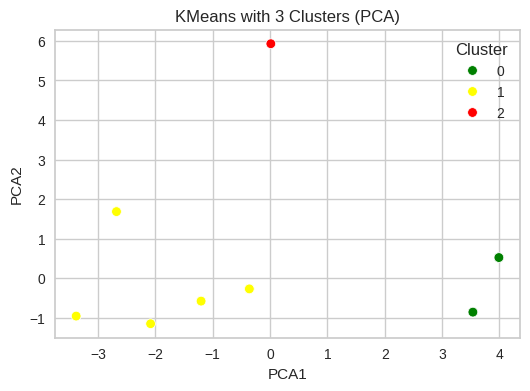

In [24]:
custom_palette = ['green', 'yellow', 'red']

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette=custom_palette)
plt.title('KMeans with 3 Clusters (PCA)')
plt.show()